In [1]:
#for Data
import math
import pandas as pd
import pandas_datareader as web
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sys 
sys.path.append("../Function/")
from function import remove_high_corr
from function import remove_outliers
from sklearn.preprocessing import MinMaxScaler

# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#for NN
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')


In [2]:
df = pd.read_excel('../../site_info_ver_4_lite.xlsx',index_col="Date",date_parser='Date')
df

,Site_Name,Israelis_Count,Tourists_Count,Total,region_Central,region_Judea_Samaria,region_North,region_South,is_weekend,operations,is_jewish_holiday,is_jewish_vacation,is_muslims_holiday,is_muslims_vacation,is_camping,special_activity,visit_duration,is_jewishHeritage,is_muslimsHeritage,is_christiansHeritage,is_nationalPark,is_natureReserve,is_archaeology,is_religion,is_animals,is_heritage,is_water,is_cave,is_lookout,pm10,pm2.5,nox,so2,Temperature,is_HeatWave,Tel_Aviv-Yafo_pm10,Jerusalem_pm10,Haifa_pm10,Ashkelon_pm10,Beer-Sheva_pm10,Tel_Aviv-Yafo_pm2.5,Jerusalem_pm2.5,Haifa_pm2.5,Ashkelon_pm2.5,Beer-Sheva_pm2.5,Tel_Aviv-Yafo_nox,Jerusalem_nox,Haifa_nox,Ashkelon_nox,Beer-Sheva_nox,Tel_Aviv-Yafo_so2,Jerusalem_so2,Haifa_so2,Ashkelon_so2,Beer-Sheva_so2,is_Site_exceeded_pm10,is_Site_exceeded_pm2.5,is_Site_exceeded_nox,is_Site_exceeded_so2,Tel_Aviv-Yafo_pm10_exceeded,Jerusalem_pm10_exceeded,Haifa_pm10_exceeded,Ashkelon_pm10_exceeded,Beer-Sheva_pm10_exceeded,Tel_Aviv-Yafo_pm2.5_exceeded,Jerusalem_pm2.5_exceeded,Haifa_pm2.5_exceeded,Ashkelon_pm2.5_exceeded,Beer-Sheva_pm2.5_exceeded,Tel_Aviv-Yafo_so2_exceeded,Jerusalem_so2_exceeded,Haifa_so2_exceeded,Ashkelon_so2_exceeded,Beer-Sheva_so2_exceeded,Tel_Aviv-Yafo_nox_exceeded,Jerusalem_nox_exceeded,Haifa_nox_exceeded,Ashkelon_nox_exceeded,Beer-Sheva_nox_exceeded,Green_border,Season_autumn,Season_spring,Season_summer,Season_winter,Day_before_Total
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,Eilat Coral Beach,35,52,87,0,0,0,1,1,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,1,0,0,24.1,NaN,5.0,0.5,19.1,0,64.1,25.6,23.3,11.2,4.9,13.9,30.1,26.2,4.8,2.5,69.1,501.7,90.2,3.8,9.7,7.2,0.1,2.6,1.2,0.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,354
2016-01-02,Eilat Coral Beach,22,17,39,0,0,0,1,1,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,1,0,0,35.6,27.9,150.3,7.9,16.6,0,154.1,277.1,50.6,26.0,51.4,87.1,80.7,93.9,21.6,36.0,749.9,1140.2,842.8,10.8,115.7,16.7,1.9,20.0,8.8,2.3,0,0,1,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,87
2016-01-03,Eilat Coral Beach,27,53,80,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,1,0,0,42.9,NaN,12.9,3.7,21.8,0,182.6,339.9,83.9,33.5,42.6,66.4,86.1,69.8,19.8,15.4,478.0,621.6,49.7,4.2,39.0,10.3,0.8,6.9,1.8,3.7,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,39
2016-01-04,Eilat Coral Beach,117,99,216,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,1,0,0,19.8,NaN,14.5,2.3,22.2,0,29.9,223.5,55.7,22.9,33.8,38.4,51.8,90.7,19.6,19.2,261.8,735.3,488.7,5.3,68.6,11.0,0.2,12.4,1.1,4.5,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,80
2016-01-05,Eilat Coral Beach,65,129,194,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,1,0,0,92.3,37.2,14.0,2.7,23.9,0,315.5,662.0,201.0,68.5,95.8,102.3,114.8,159.8,53.9,30.5,306.0,1248.2,272.1,6.4,35.8,6.0,0.6,9.9,1.4,6.4,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-07,Gan HaShlosha,2789,0,2789,0,0,1,0,1,0,0,1,0,1,1,0,4,0,0,0,1,0,0,0,0,0,1,0,0,63.7,17.3,1.3,0.4,16.8,1,143.3,441.0,105.1,30.0,37.7,185.5,76.9,163.1,18.1,13.9,1219.5,821.8,183.4,5.4,29.7,3.4,2.9,13.2,2.7,7.8,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,2771
2021-08-08,Gan HaShlosha,2470,2,2472,0,0,1,0,0,0,0,1,0,1,1,0,4,0,0,0,1,0,0,0,0,0,1,0,0,37.7,NaN,8.6,3.5,16.8,1,205.6,364.5,174.5,67.6,46.0,223.6,106.0,198.8,25.0,17.0,1066.2,659.6,104.3,2.5,27.6,6.7,2.5,2.2,0.9,3.5,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,2789
2021-08-09,Gan HaShlosha,2036,0,2036,0,0,1,0,0,0,0,1,1,1,1,0,4,0,0,0,1,0,0,0,0,0,1,0,0,35.1,15.0,47.2,4.9,16.8,1,110.2,134.2,79.5,28.2,26.1,131.4,49.6,98.5,15.3,10.7,189.7,499.7,83.6,4.8,24.5,8.4,3.0,8.4,2.2,3.7,0,0,0,0,0,1,0,0

In [67]:
df_Eilat_Coral_Beach = df[df.Site_Name=='Eilat Coral Beach']
# df_Eilat_Coral_Beach = df_Eilat_Coral_Beach[['Israelis_Count']]
df_Eilat_Coral_Beach.Israelis_Count=np.log(df_Eilat_Coral_Beach.Israelis_Count+0.01)

C:\Users\asars\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0, 0.5, 'Israelis_Count')

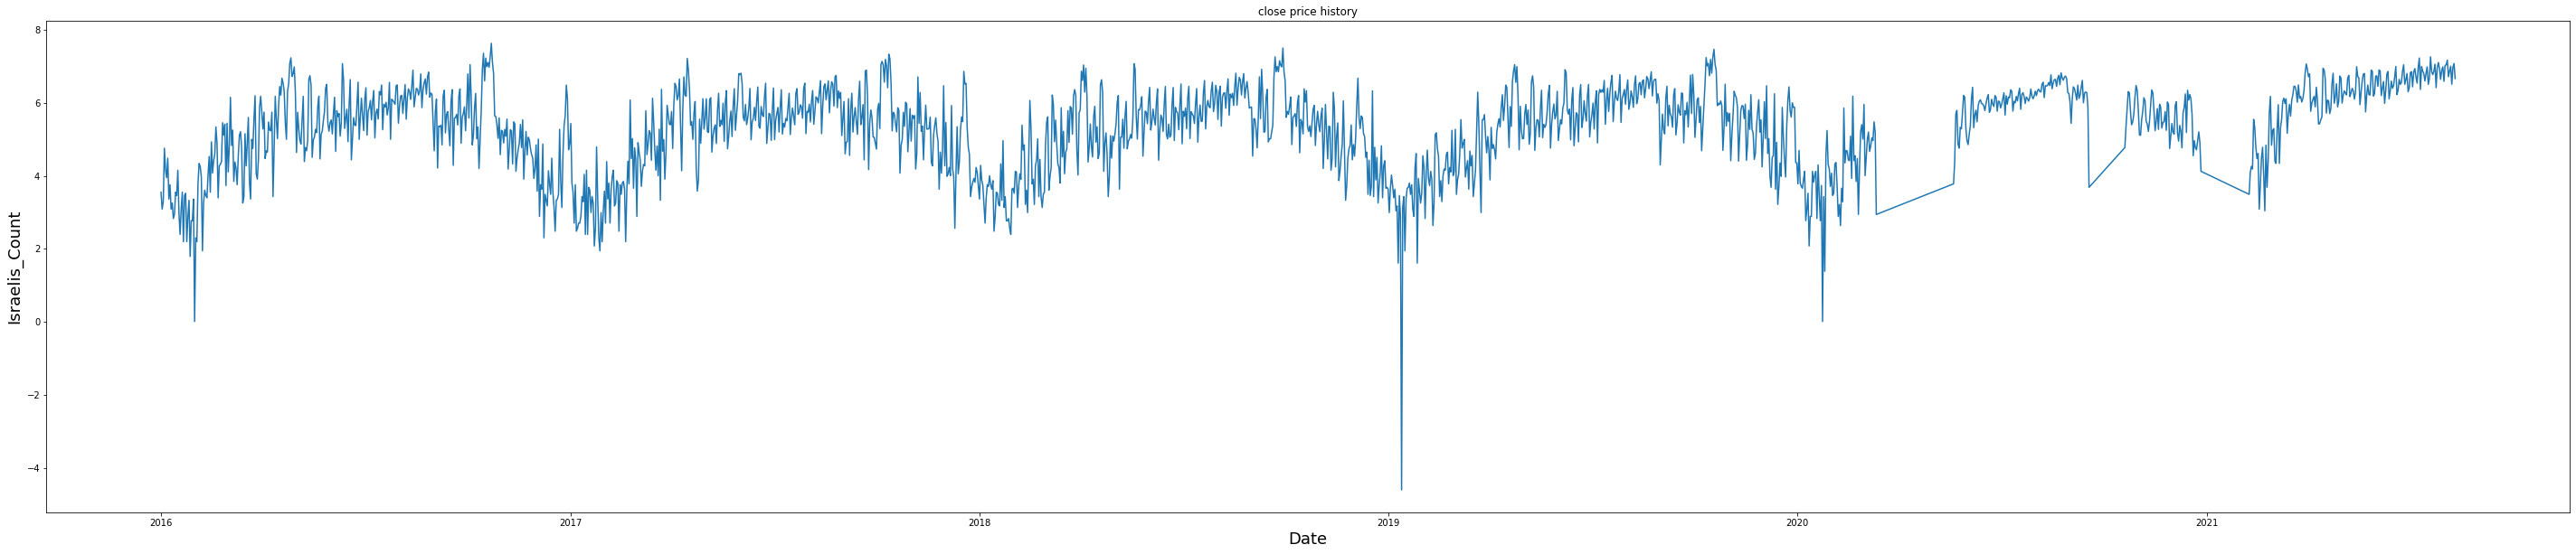

In [68]:
#visualize the closing price history 
plt.figure(figsize=(50,10))
plt.title("close price history")
plt.plot(df_Eilat_Coral_Beach['Israelis_Count'])
plt.xlabel('Date',fontsize=18)
plt.ylabel("Israelis_Count",fontsize=18)

In [69]:
#Create a new DataFrame only with close column
data = df_Eilat_Coral_Beach.filter(['Temperature','Israelis_Count'])
#Convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len
dataset

array([[19.1       ,  3.55563373],
       [16.6       ,  3.0914969 ],
       [21.8       ,  3.29620717],
       ...,
       [41.9       ,  6.98008524],
       [41.1       ,  7.08339624],
       [40.9       ,  6.670779  ]])

In [70]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14857143, 0.66662739],
       [0.07714286, 0.62871368],
       [0.22571429, 0.64543575],
       ...,
       [0.8       , 0.9463588 ],
       [0.77714286, 0.95479791],
       [0.77142857, 0.92109266]])

In [91]:
#Create the Training data set
#create the scaled training data set

train_data = scaled_data[0:training_data_len,:]
#split to X_train and y_train data sets

x_train=train_data[:,0]
y_train=train_data[:,1]

# for i in range(60,len(train_data)):
#     x_train.append(train_data[i-60:i,:])
#     y_train.append(train_data[i,-1])
#     if i<=60:
#         print(x_train)
#         print(y_train)

#Convert the X_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train )

In [110]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],1,1))
x_train.shape

(1523, 1, 1)

In [105]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [107]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [108]:
#train the model.
model.fit(x_train,y_train,batch_size=10,epochs=50,validation_split=0.2)

Epoch 1/50
122/122 [==============================] - 4s 9ms/step - loss: 0.1000 - val_loss: 0.0049
Epoch 2/50
122/122 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 3/50
122/122 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0053
Epoch 4/50
122/122 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 5/50
122/122 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 6/50
122/122 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 7/50
122/122 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 8/50
122/122 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 9/50
122/122 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 10/50
122/122 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0047

KeyboardInterrupt: 

In [ ]:
#Create the tasting data set
#Create a new array containing scaled values
test_data=scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(2949, 60, 1)

In [ ]:
#Get the mpdeles predicted price values
predictions = model.predict(x_test)
predictions = np.exp(scaler.inverse_transform(predictions ))


In [ ]:
#Get the RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

312.23592875140446

C:\Users\asars\AppData\Local\Temp/ipykernel_6172/3073074317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


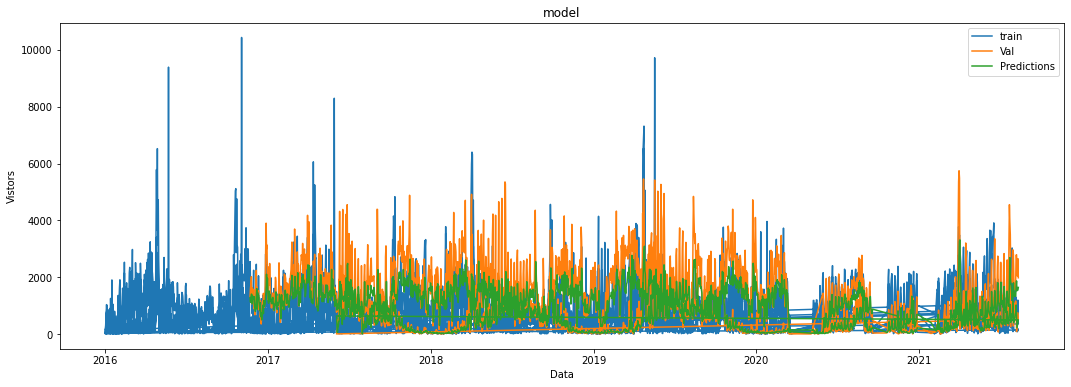

In [ ]:
#plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(18,6))
plt.title("model")
plt.xlabel("Data")
plt.ylabel("Vistors")
plt.plot(train['Israelis_Count'])
plt.plot(valid[['Israelis_Count','Predictions']])
plt.legend(['train','Val','Predictions'])
plt.show()

In [ ]:
#Show the valid and the prediction price
valid

,Israelis_Count,Predictions
Date,,
2016-11-21,1313,1280.182495
2016-11-22,1624,1117.746338
2016-11-23,1749,1252.962402
2016-11-24,2014,1403.616089
2016-11-25,1059,1389.182495
...,...,...
2021-08-07,2789,1868.340576
2021-08-08,2470,1522.146851
2021-08-09,2036,1543.295410


In [ ]:
# #get the quote 
# apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
# #Create a new DataFrame
# new_df=apple_quote.filter(['Close'])
# #get the last 60 dat closing price values and convert the datafrem to an array 
# last_60_days = new_df[-60:].values
# #Scaled the data to be values between 0 - 1
# last_60_days_scaled = scaler.transform(last_60_days)
# #Create an empty list
# X_test = [] 
# #Append the past 60 days
# X_test.append(last_60_days_scaled)
# #convert the x_test data set to numpy array
# X_test = np.array(X_test)
# #Rehsape the data
# X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# #Get the predicited scaled price
# pred_price = model.predict(X_test)
# #undo scaling 
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)

In [ ]:
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')
apple_quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-18,70.474998,69.779999,69.949997,69.934998,116028400,68.823692
